Data analysis Task-4

Exploratory Data Analysis 

Aspiring Minds Employability Outcomes (AMEO Data)

### Introduction
The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features.

Objective-
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

In [3]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.rcParams['figure.figsize'] = [10,8]

STEP-1

In [4]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [5]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [7]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
df.shape

(3998, 39)

In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [11]:
df.duplicated().sum()

0

In [12]:
#Data cleaning
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [13]:
df = df.drop(columns=['Unnamed: 0'])

STEP-2 
Univariate Analysis

In [14]:
num_df = df.select_dtypes(include=['int64','float64'])
num_df.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [15]:
#excluding ID columns as its not statistically useful
num_df = num_df.drop(columns=['ID','CollegeID','CollegeTier','CollegeCityID','CollegeCityTier',])

In [16]:
len(num_df.columns)

22

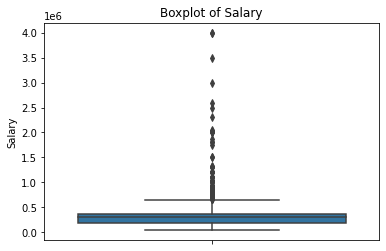

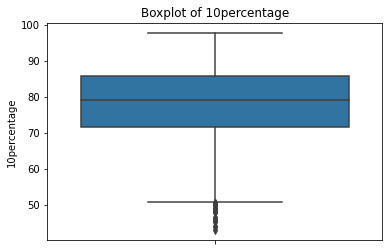

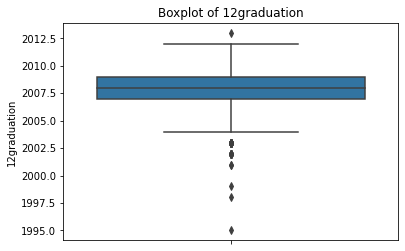

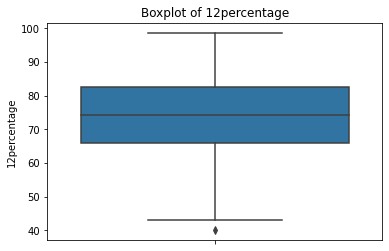

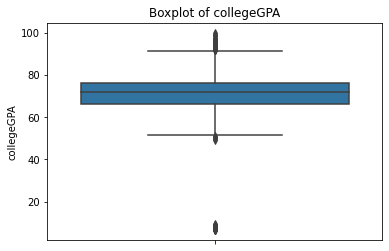

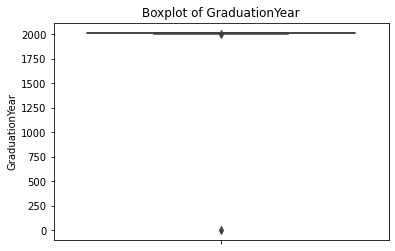

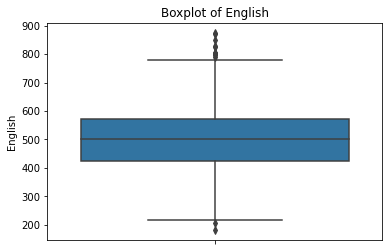

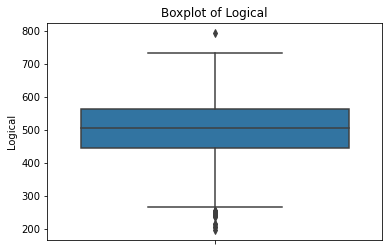

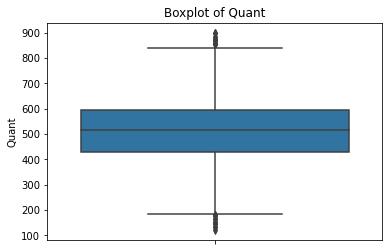

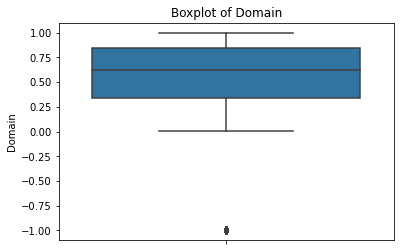

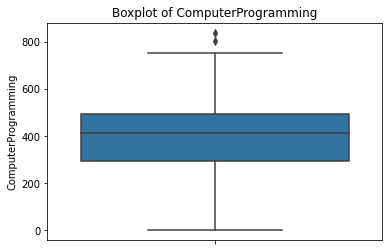

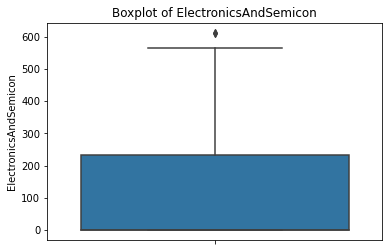

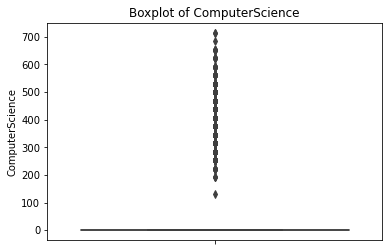

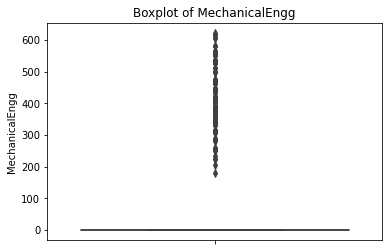

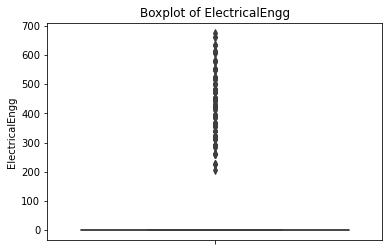

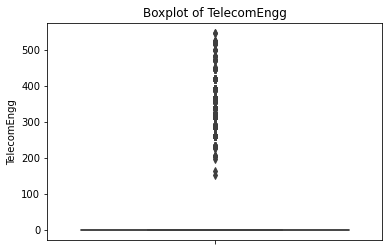

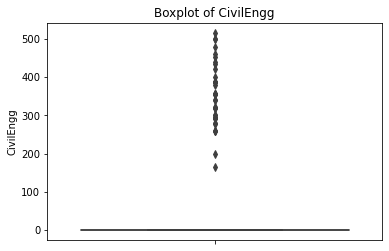

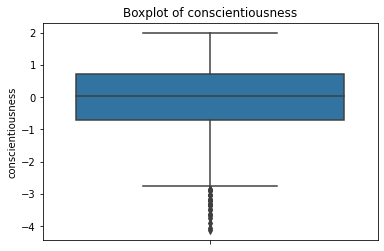

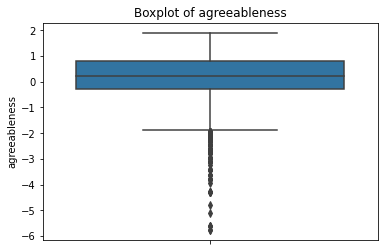

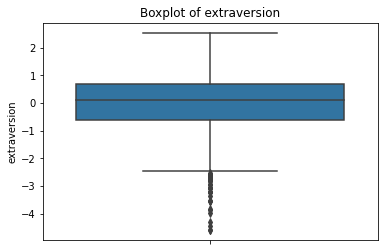

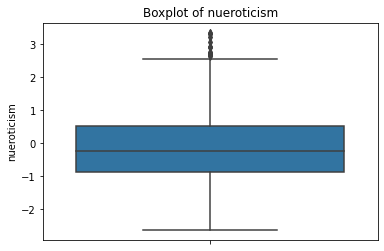

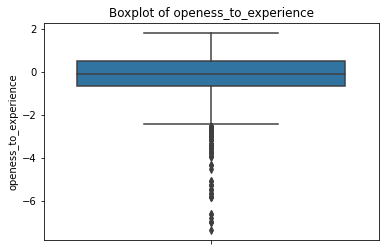

In [17]:
# create a box plot for each numerical column
for col in num_df.columns:
    sns.boxplot(y=num_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

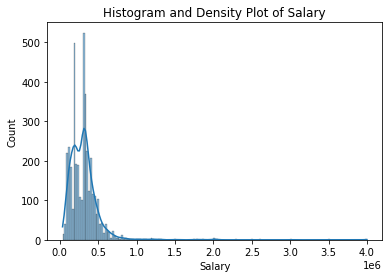

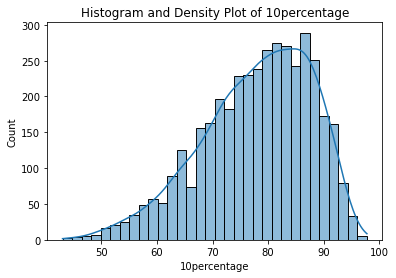

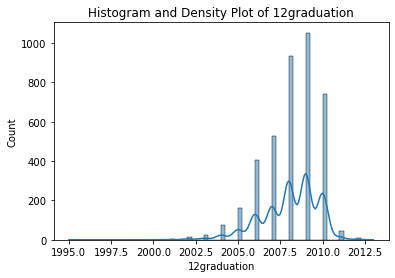

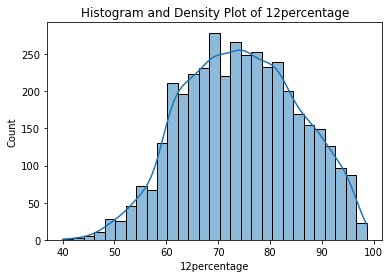

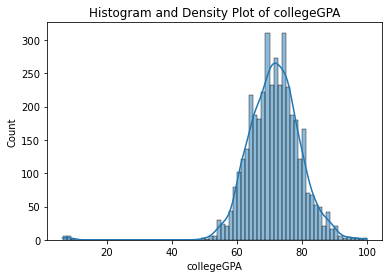

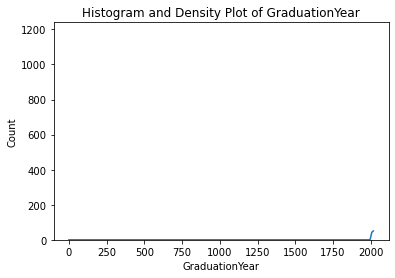

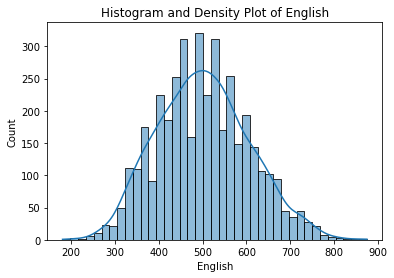

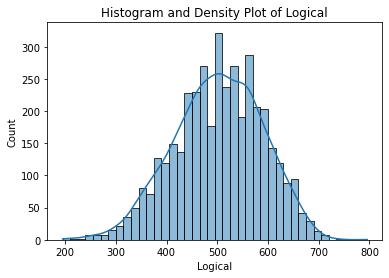

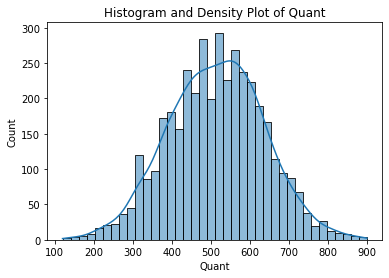

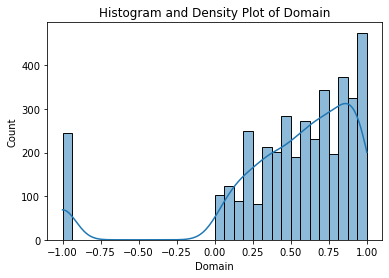

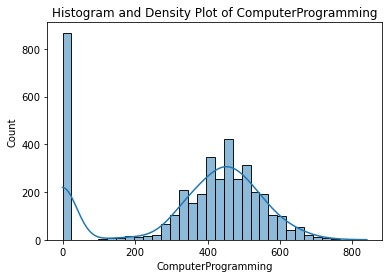

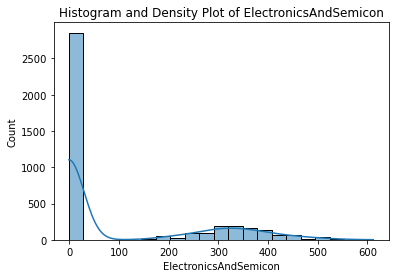

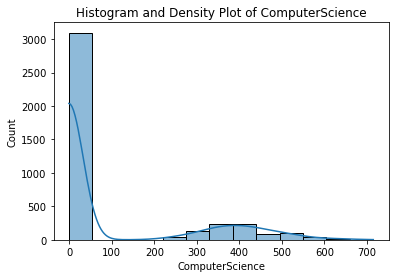

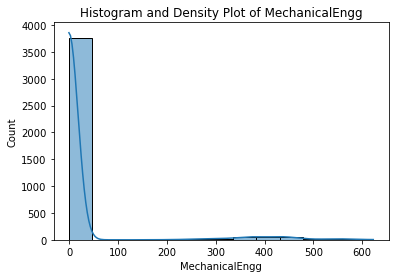

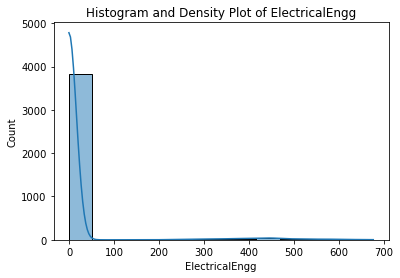

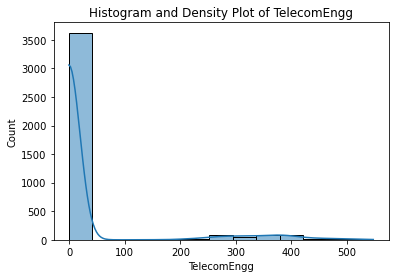

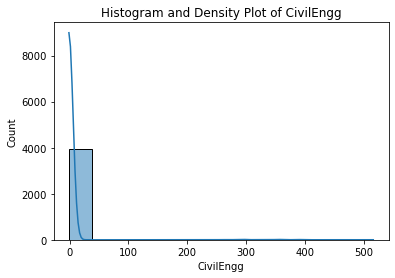

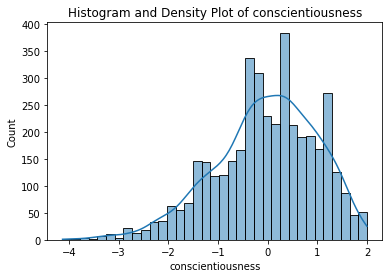

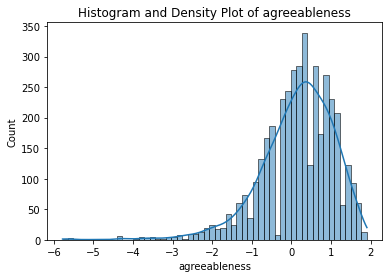

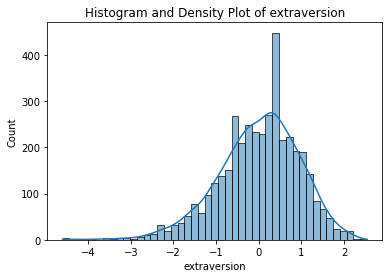

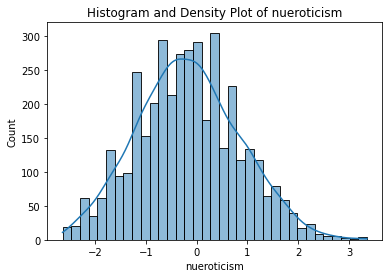

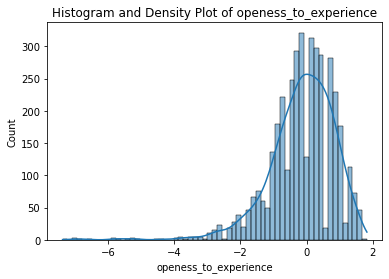

In [18]:
# create histogram and density plot for each numerical column
for col in num_df.columns:
    sns.histplot(x=num_df[col], kde=True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

Univariate analysis (Salary)

In [19]:
#univariate analysis (Salary)
print(df['Salary'].max())
print(df['Salary'].min())
print(df['Salary'].std())
print(df['Salary'].std())
print(df['Salary'].mean())
print(df['Salary'].quantile(0.25))
print(df['Salary'].quantile(0.75))

4000000
35000
212737.4999568574
212737.4999568574
307699.8499249625
180000.0
370000.0


<AxesSubplot:>

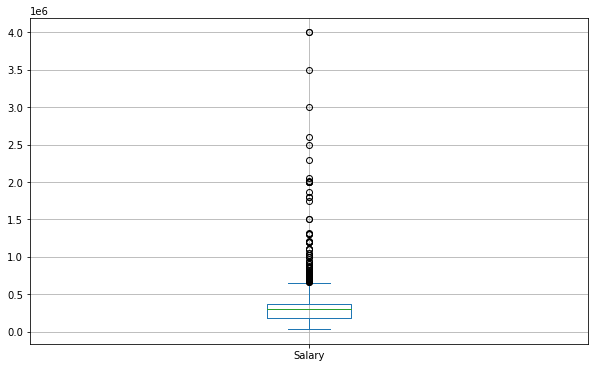

In [20]:
#Boxplot of salary data
df['Salary'].plot(kind='box',grid = True,figsize =(10,6))

<AxesSubplot:ylabel='Density'>

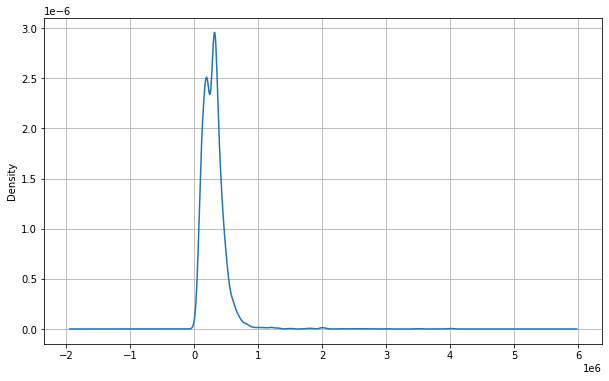

In [21]:
df['Salary'].plot(kind='kde',grid = True,figsize =(10,6))

Average Salary is around 3lac

Univariate analysis (10percentage)

In [22]:
#univariate analysis (10percentage)
print(df['10percentage'].max())
print(df['10percentage'].min())
print(df['10percentage'].std())
print(df['10percentage'].std())
print(df['10percentage'].mean())
print(df['10percentage'].quantile(0.25))
print(df['10percentage'].quantile(0.75))

97.76
43.0
9.850162410652587
9.850162410652587
77.9254427213606
71.68
85.67


<AxesSubplot:>

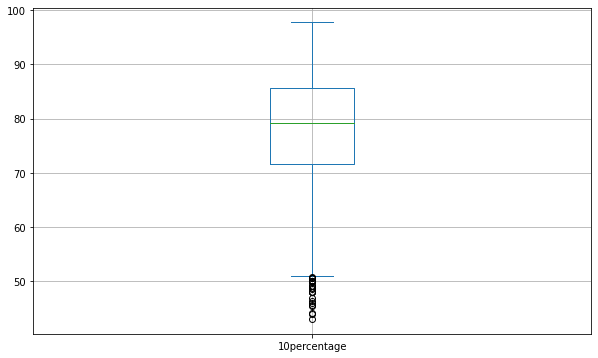

In [23]:
#Boxplot of salary data
df['10percentage'].plot(kind='box',grid = True,figsize =(10,6))

In [24]:
#Univariate analysis (10board)
print(df['12percentage'].max())
print(df['12percentage'].min())
print(df['12percentage'].std())
print(df['12percentage'].std())
print(df['12percentage'].mean())
print(df['12percentage'].quantile(0.25))
print(df['12percentage'].quantile(0.75))

98.7
40.0
10.999933102957728
10.999933102957728
74.46636568284127
66.0
82.6


<AxesSubplot:>

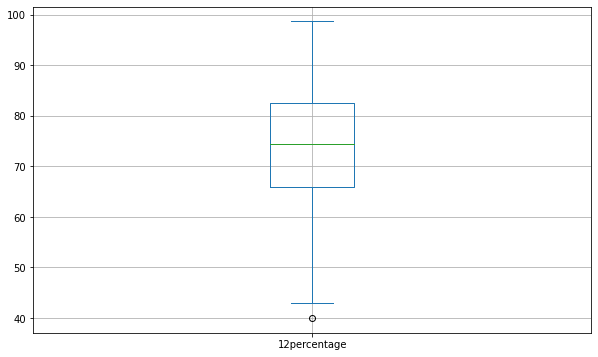

In [25]:
#Boxplot of salary data
df['12percentage'].plot(kind='box',grid = True,figsize =(10,6))

<AxesSubplot:ylabel='Density'>

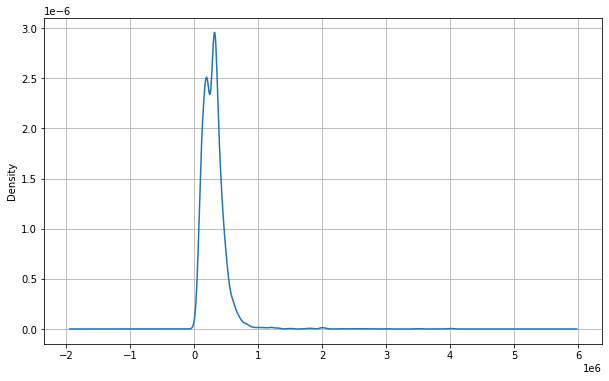

In [26]:
df['Salary'].plot(kind='kde',grid = True,figsize =(10,6))

BiVariate Analysis

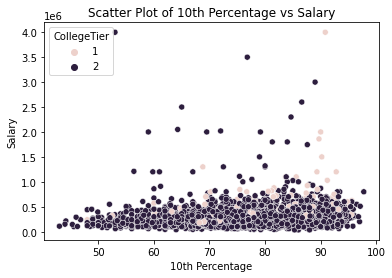

In [27]:
sns.scatterplot(x="10percentage", y="Salary", hue="CollegeTier", data=df)
plt.title("Scatter Plot of 10th Percentage vs Salary")
plt.xlabel("10th Percentage")
plt.ylabel("Salary")
plt.show()

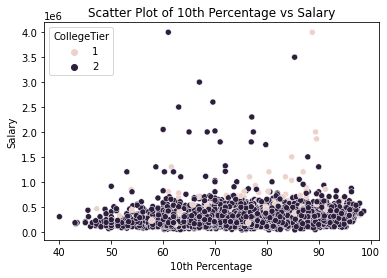

In [28]:
sns.scatterplot(x="12percentage", y="Salary", hue="CollegeTier", data=df)
plt.title("Scatter Plot of 10th Percentage vs Salary")
plt.xlabel("10th Percentage")
plt.ylabel("Salary")
plt.show()

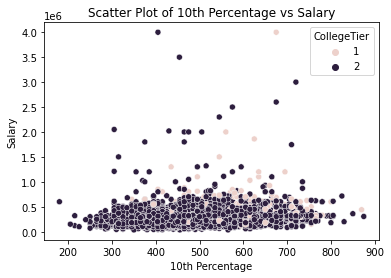

In [29]:
sns.scatterplot(x="English", y="Salary", hue="CollegeTier", data=df)
plt.title("Scatter Plot of 10th Percentage vs Salary")
plt.xlabel("10th Percentage")
plt.ylabel("Salary")
plt.show()

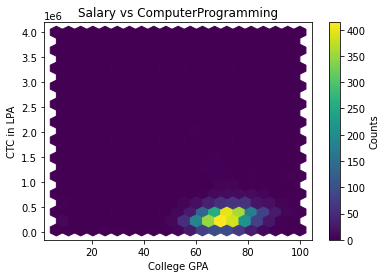

In [30]:
x = df.collegeGPA
y = df.Salary

# Create a hexbin plot
plt.hexbin(x, y, gridsize=20, cmap='viridis')

# Set plot title and axis labels
plt.title("Salary vs ComputerProgramming")
plt.xlabel("College GPA")
plt.ylabel("CTC in LPA")

# Show colorbar
plt.colorbar(label="Counts")

# Display the plot
plt.show()

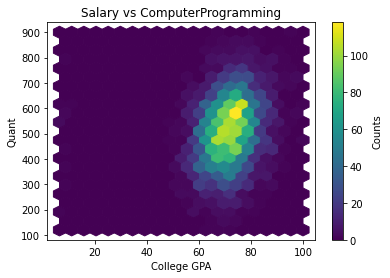

In [31]:
x = df.collegeGPA
y = df.Quant

# Create a hexbin plot
plt.hexbin(x, y, gridsize=20, cmap='viridis')

# Set plot title and axis labels
plt.title("Salary vs ComputerProgramming")
plt.xlabel("College GPA")
plt.ylabel("Quant")

# Show colorbar
plt.colorbar(label="Counts")

# Display the plot
plt.show()

In [ ]:
sns.pairplot(data = num_df, diag_kind='kde')

In [ ]:
# Create a swarm plot
sns.swarmplot(x="collegeGPA", y="12percentage", data=num_df)

# Set plot title and axis labels
plt.title("Swarm Plot of College GPA Vs 12th")
plt.xlabel("College GPA")
plt.ylabel("12th")

# Display the plot
plt.show()

“After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.”

In [ ]:
X= df[['collegeGPA','CollegeTier','10percentage','12percentage']]
Y = df['Salary']

In [ ]:
from scipy.stats import t
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
confidence_level = 0.95
expected_range = y_train
sample_mean = np.mean(y_train)
sample_size = len(y_train)
sample_std = np.std(y_train, ddof=1)
alpha = 1 - confidence_level

# Calculate t-score
t_score = (sample_mean - expected_range[0]) / (sample_std / np.sqrt(sample_size))

# Calculate critical value (two-tailed test)
critical_value = t.ppf(1 - alpha / 2, df=sample_size - 1)

# Perform hypothesis test
if t_score < -critical_value or t_score > critical_value:
    result = "Reject null hypothesis"
else:
    result = "Fail to reject null hypothesis"
    
#Output results
print("Sample mean: {:.2f}".format(sample_mean))
print("T-score: {:.2f}".format(t_score))
print("Critical value: {:.2f}".format(critical_value))
print("Result: {}".format(result))

Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

In [ ]:
import scipy.stats as stats

# Sample data as a pandas DataFrame
data = df[['Gender','Designation']]

# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Designation'])

# Perform chi-squared test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print("\nChi-squared statistic: {:.4f}".format(chi2))
print("Degrees of freedom: {}".format(dof))
print("P-value: {:.4f}".format(p_value))

# Set significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("\nThere is evidence to reject the null hypothesis.")
    print("There is a relationship between gender and Designation preferences.")
else:
    print("\nThere is no evidence to reject the null hypothesis.")
    print("There is no relationship between gender and Designation preferences.")


In [ ]:
from sklearn.preprocessing import StandardScaler

# Sample data as a pandas DataFrame
data_1 = df[['Salary','10percentage','12percentage','Gender','Designation']]

# Separate numerical and categorical features
numerical_features = ['Salary', '10percentage','12percentage']
categorical_features = ['Gender', 'Designation']

# Standardize numerical features
scaler = StandardScaler()
data_1[numerical_features] = scaler.fit_transform(data_1[numerical_features])

# Encode categorical features
for feature in categorical_features:
    if data_1[feature].nunique() > 2:
        # Use dummy variables for features with more than 2 categories
        dummies = pd.get_dummies(data_1[feature], prefix=feature)
        data_1 = pd.concat([data_1, dummies], axis=1)
        data_1.drop(feature, axis=1, inplace=True)
    else:
        # Convert features with 2 categories to binary encoding
        data_1[feature] = data_1[feature].map({'Male': 0, 'Female': 1})

# Output transformed data
print("Transformed Data:")
print(data_1)